In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
#x_train - train_images, y_train - train_labels

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#Исследование данных


x_train.shape
x_test.shape
len(y_train)
len(y_test)

10000

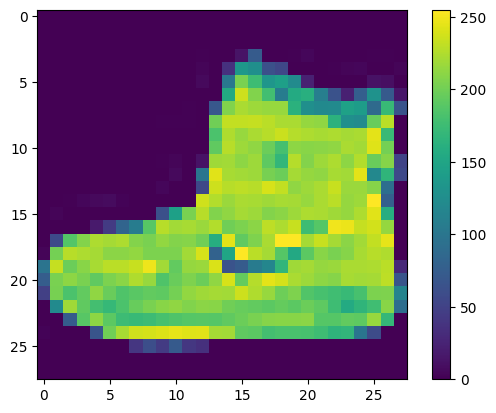

In [5]:
#Предварительная обработка данных

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

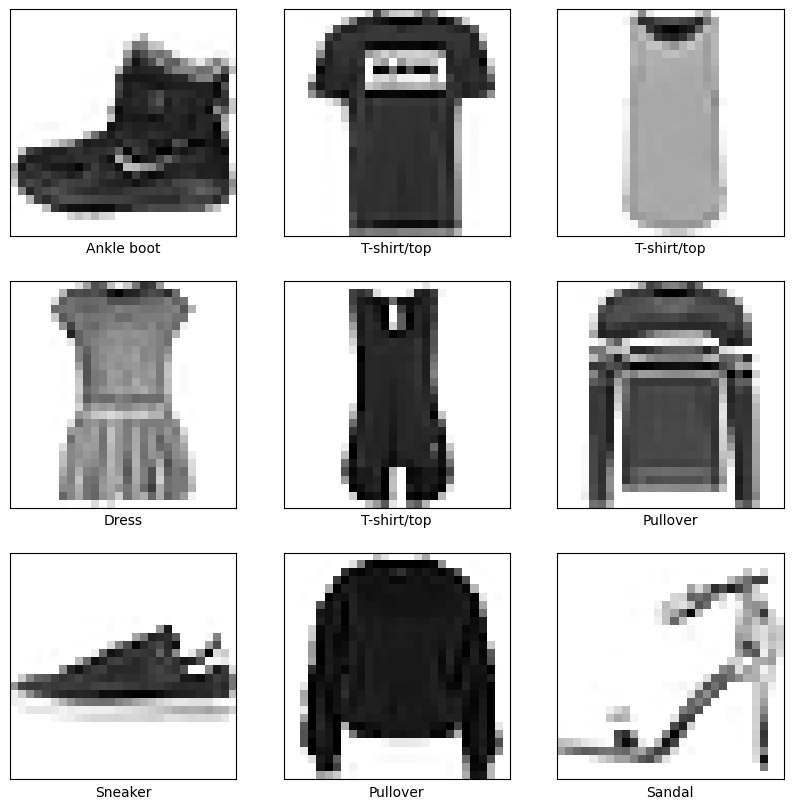

In [7]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

In [8]:
#Создание модели

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
#Скомпилирование модели

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
#Обучение модели

model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7790 - loss: 0.6314
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8636 - loss: 0.3785
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8769 - loss: 0.3379
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8901 - loss: 0.3086
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8943 - loss: 0.2869


In [11]:
#Оценка точности

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy = ', test_acc) # test_acc = 0.87, train_acc = 0.89 => модель переобучена

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8799 - loss: 0.3326
Test accuracy =  0.8790000081062317


In [12]:
#Прогнозирование

predictions = model.predict(x_test)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.0872041e-05, 5.9958691e-09, 8.6883608e-07, 6.5733730e-07,
       3.9193292e-06, 2.2311758e-02, 6.0437637e-06, 5.0869070e-02,
       3.7952552e-05, 9.2673880e-01], dtype=float32)

In [13]:
np.argmax(predictions[0])

np.int64(9)

In [14]:
y_test[0]

np.uint8(9)

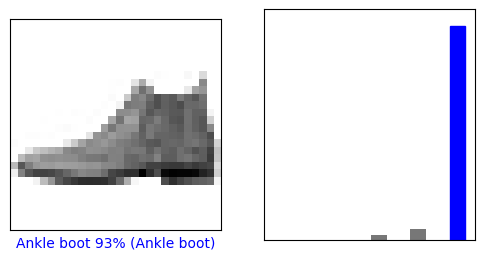

In [15]:
#Напишем функции для визуализации этих предсказаний

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label: color = 'blue'
  else: color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)



def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([]) #disable ticks
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim(0, 1)
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")





i = 0;
plt.figure(figsize = (6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)

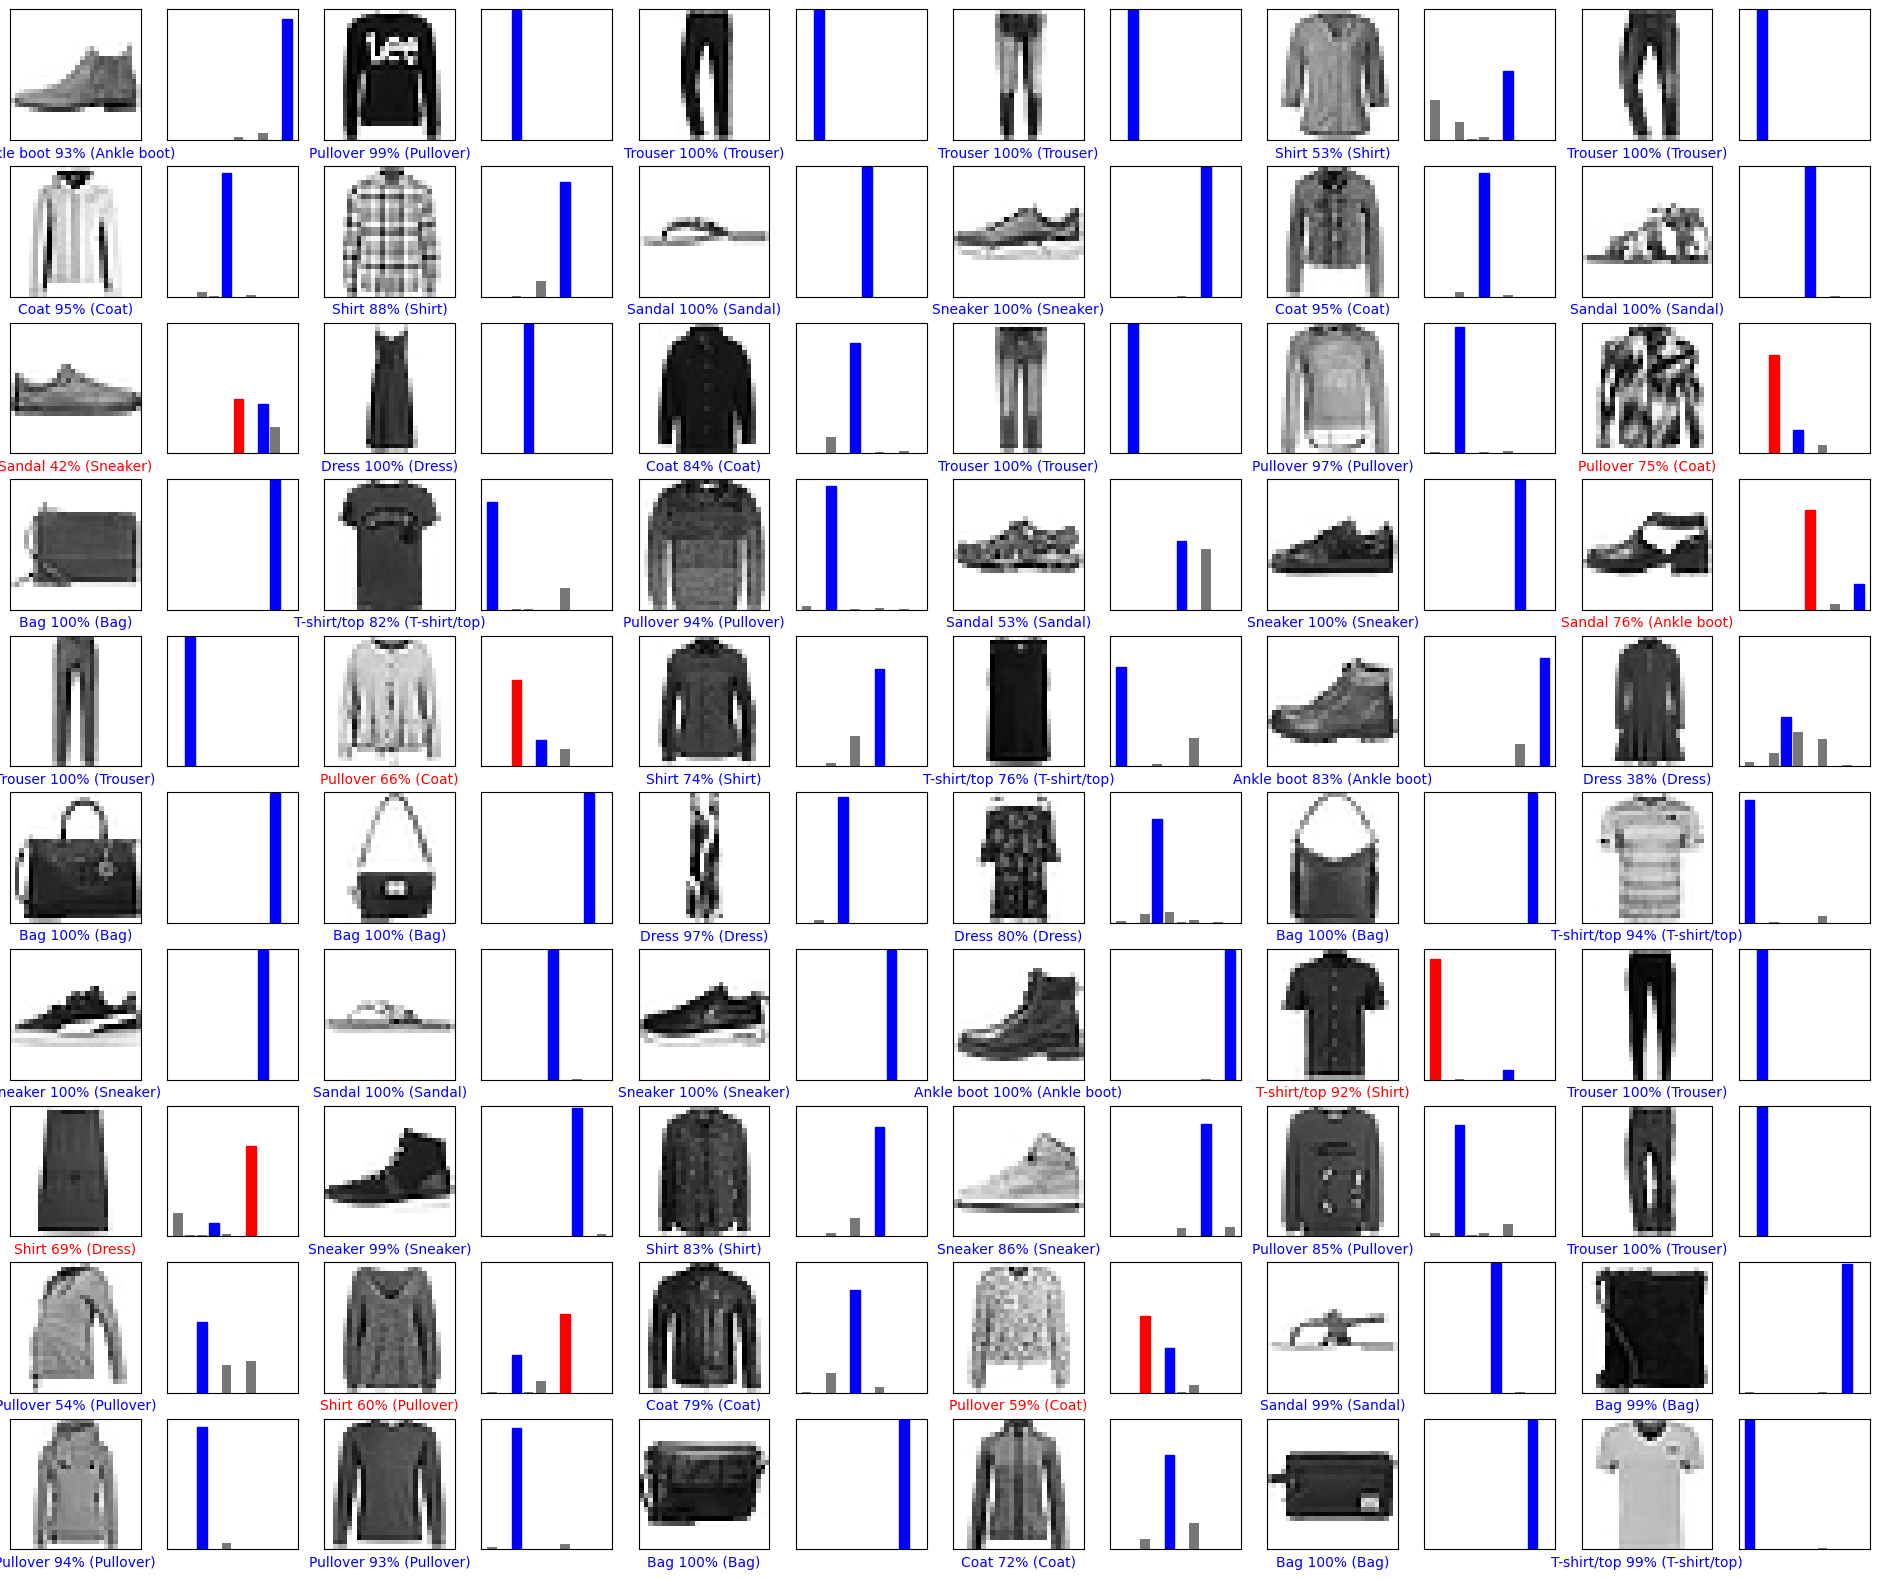

In [16]:
num_rows = 10
num_cols = 6
num_img = num_rows * num_cols

plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_img):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[3.0872041e-05 5.9958691e-09 8.6883944e-07 6.5733599e-07 3.9193214e-06
  2.2311736e-02 6.0437696e-06 5.0869081e-02 3.7952697e-05 9.2673880e-01]]


np.int64(9)

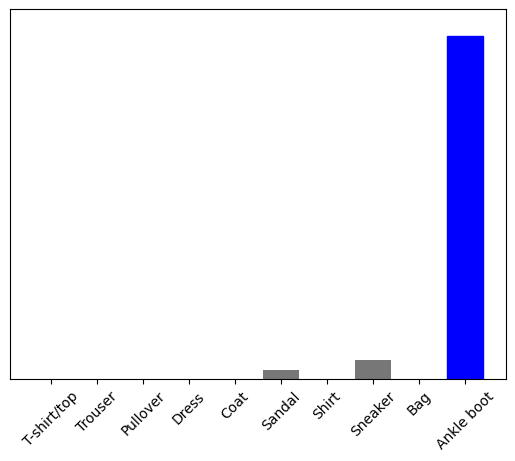

In [18]:
# Возьмём изображение из тестового набора данных

img = x_test[0]

#Добавим изображение в пакет, где он является единственным членом

img = (np.expand_dims (img, 0))

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])